# Linear Regression Project

## NASA Airfoil Pressure Level

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br>

Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

Data Set Information: <br>
The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. <br>
The span of the airfoil and the observer position were the same in all of the experiments.

Independent variables: <br>
1. Frequency, in Hertzs. <br>
2. Angle of attack, in degrees. <br>
3. Chord length, in meters. <br>
4. Free-stream velocity, in meters per second. <br>
5. Suction side displacement thickness, in meters. <br>

Dependent variable: <br>
6. Scaled sound pressure level, in decibels.

Timing the script:

In [67]:
from datetime import datetime
startTime = datetime.now()

Quick fix for the dark theme plotting to have readable labels:

In [68]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Basic libraries:

In [69]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting to have readable labels:

In [70]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

Importing dataset:

In [71]:
df_original = pd.read_csv("airfoil_self_noise.dat", 
                          sep='\t', 
                          names=["Frequency", "AoA", "Chord", "V_inf", "displacement_t", "SPL"], 
                          engine='python')

Making a copy:

In [72]:
df = df_original.copy()

### Data exploration:

Checking the structure:

In [73]:
df

Frequency   AoA   Chord  V_inf  displacement_t      SPL
0           800   0.0  0.3048   71.3        0.002663  126.201
1          1000   0.0  0.3048   71.3        0.002663  125.201
2          1250   0.0  0.3048   71.3        0.002663  125.951
3          1600   0.0  0.3048   71.3        0.002663  127.591
4          2000   0.0  0.3048   71.3        0.002663  127.461
...         ...   ...     ...    ...             ...      ...
1498       2500  15.6  0.1016   39.6        0.052849  110.264
1499       3150  15.6  0.1016   39.6        0.052849  109.254
1500       4000  15.6  0.1016   39.6        0.052849  106.604
1501       5000  15.6  0.1016   39.6        0.052849  106.224
1502       6300  15.6  0.1016   39.6        0.052849  104.204

[1503 rows x 6 columns]

Basic check for the type of data:

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frequency       1503 non-null   int64  
 1   AoA             1503 non-null   float64
 2   Chord           1503 non-null   float64
 3   V_inf           1503 non-null   float64
 4   displacement_t  1503 non-null   float64
 5   SPL             1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [75]:
df.describe()

Frequency          AoA        Chord        V_inf  displacement_t  \
count   1503.000000  1503.000000  1503.000000  1503.000000     1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745        0.011140   
std     3152.573137     5.918128     0.093541    15.572784        0.013150   
min      200.000000     0.000000     0.025400    31.700000        0.000401   
25%      800.000000     2.000000     0.050800    39.600000        0.002535   
50%     1600.000000     5.400000     0.101600    39.600000        0.004957   
75%     4000.000000     9.900000     0.228600    71.300000        0.015576   
max    20000.000000    22.200000     0.304800    71.300000        0.058411   

               SPL  
count  1503.000000  
mean    124.835943  
std       6.898657  
min     103.380000  
25%     120.191000  
50%     125.721000  
75%     129.995500  
max     140.987000

Routine check for missing values:

In [76]:
df.isnull().sum()

Frequency         0
AoA               0
Chord             0
V_inf             0
displacement_t    0
SPL               0
dtype: int64

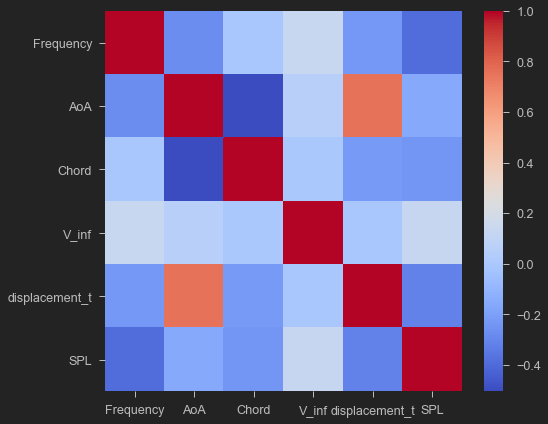

In [77]:
sns.heatmap(df.corr(), cmap='coolwarm')

Checking for correlations:

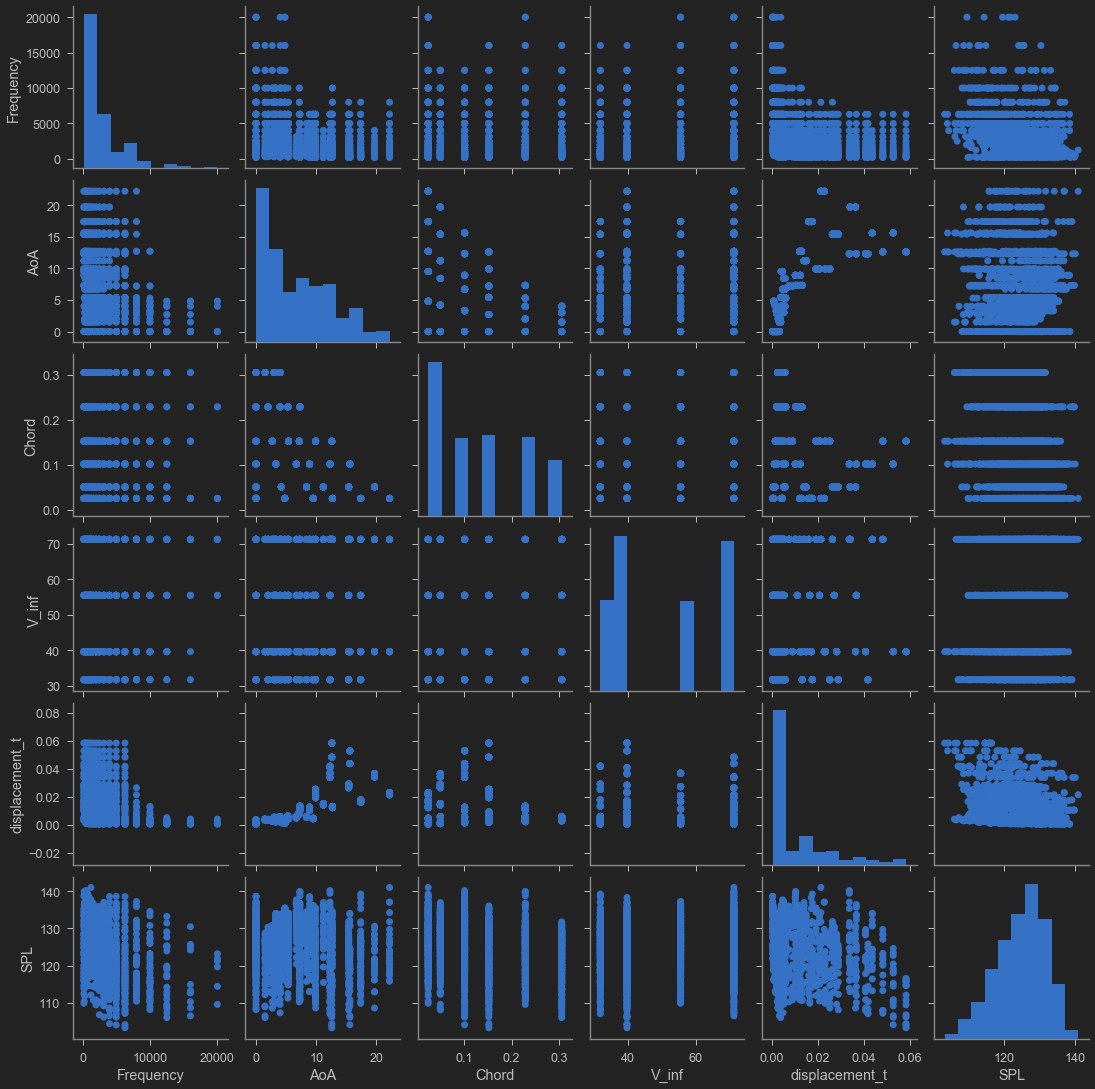

In [78]:
sns.pairplot(df, plot_kws=dict(edgecolor="none"))

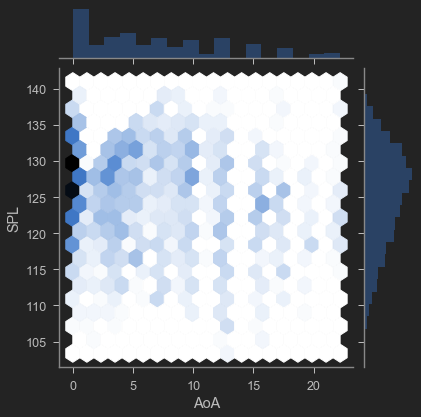

In [79]:
sns.jointplot(x='AoA',y='SPL',data=df, kind='hex');

### Train-Test set split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
y = df['SPL']
X = df.drop(['SPL'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling the data
Not a must in linear regression due to coefficients accounting for scale of numbers but helps in interpretation.

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Multiple Linear Regression

### Training the model

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
linear_model = LinearRegression()

In [86]:
linear_model.fit(X_train,y_train)

LinearRegression()

### Predictions:

In [87]:
for coefficient in linear_model.coef_:
    print(coefficient)

-4.059447042606654
-2.3667367900365717
-3.2199521491835017
1.5269010028407006
-1.8155901496175622


Predicted Sound Pressure Levels (SPL):

In [88]:
predictions_lin = linear_model.predict(X_test)

Checking how did simple linear model perform (actually, not too good):

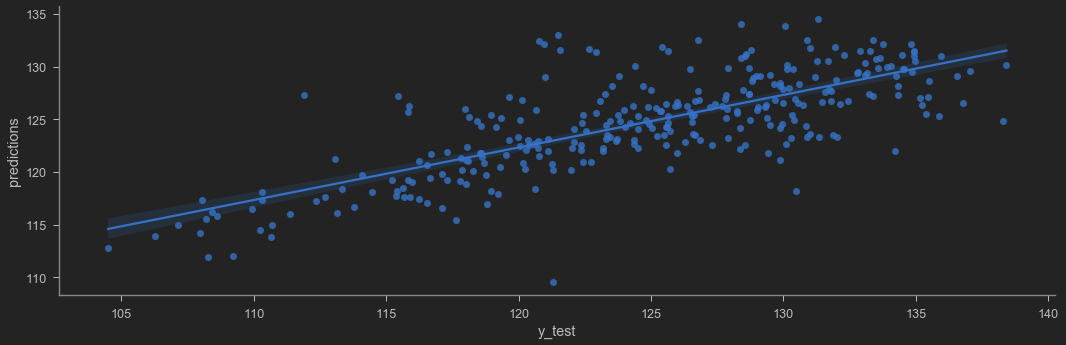

In [89]:
pred_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_lin})
sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_df,
           height=5,
           aspect=3)

### Residuals (y_test - y_pred) - checking for normality:

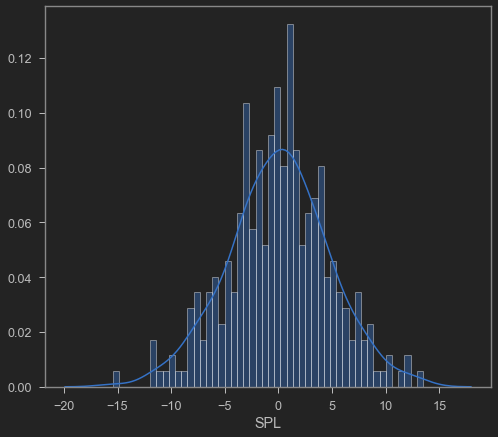

In [90]:
sns.distplot((y_test-predictions_lin),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

Standard deviation of the residuals:

In [91]:
(y_test-predictions_lin).std()

4.711939262503512

### Coefficients table:

In [92]:
coeffecients = pd.DataFrame(data=linear_model.coef_,
                            index=X.columns,
                            columns=['Coeffecient'])
coeffecients

Coeffecient
Frequency         -4.059447
AoA               -2.366737
Chord             -3.219952
V_inf              1.526901
displacement_t    -1.815590

Frequency, Angle of attack and Chord length have the biggest impact on self-induced noise of NACA 0012 airfoil.

### R2 score:

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y_test, predictions_lin)

0.5582979754897284

## Choosing the right polynomial degree:
Choosing RootMean Square as an indicator. It penalizes the outliers but less than MSE.

In [95]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

RMSE_score = [] #RMSE between the predicted values and the test
training_fit = [] #RMSE between the predicted values and the training set on which the data was trained (expected overfit)

degrees = range(1,7)

for deg in degrees:
    
    poly_reg = PolynomialFeatures(degree=deg)
    
    X_poly_train = poly_reg.fit_transform(X_train)
    X_poly_test  = poly_reg.fit_transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    
    predictions_poly = poly_model.predict(X_poly_test)
    RMSE_poly = np.sqrt(metrics.mean_squared_error(y_test, predictions_poly)) 
    
    predictions_train = poly_model.predict(X_poly_train)                        # not paramount, just to check
    fit_poly =  np.sqrt(metrics.mean_squared_error(y_train, predictions_train)) # not paramount, just to check
     
    RMSE_score.append(RMSE_poly)
    training_fit.append(fit_poly) # not paramount, just to check

### Elbow curve:

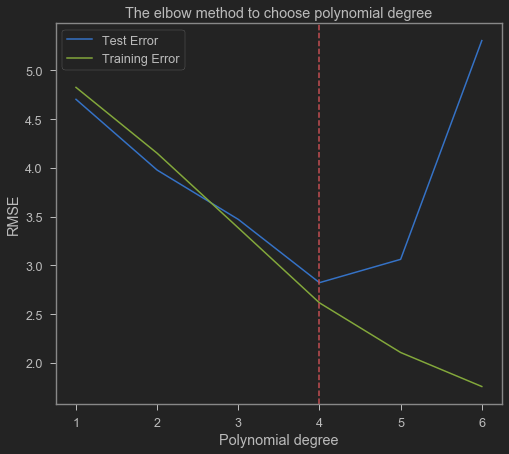

In [96]:
plt.plot(degrees, RMSE_score, label='Test Error')
plt.plot(degrees, training_fit, label='Training Error')

plt.axvline(x=4, color='r', linestyle='--')

plt.title('The elbow method to choose polynomial degree')
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Above 4th degree we begin to overfit!

## Polynomial Linear Regression:

In [97]:
poly_reg = PolynomialFeatures(degree=4)

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test  = poly_reg.fit_transform(X_test)

In [98]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [99]:
predictions_poly = poly_model.predict(X_poly_test)

### LM plot

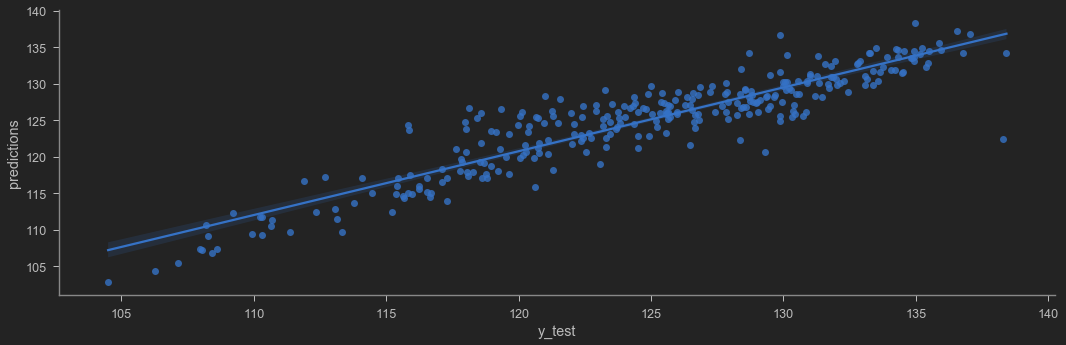

In [100]:
pred_poly_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_poly})

sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_poly_df, 
           height=5, 
           aspect=3);

### Residuals (y_test - y_pred) - checking for normality:

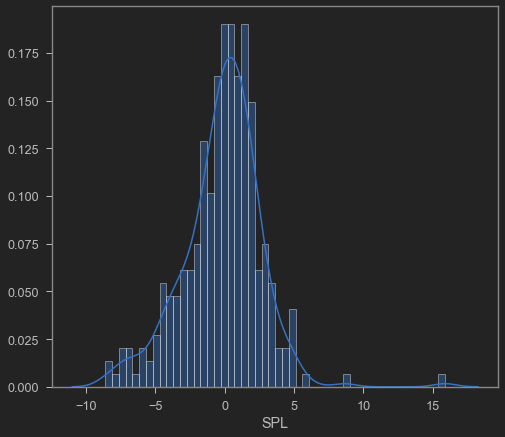

In [101]:
sns.distplot((y_test-predictions_poly),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

Smaller standard deviation for the polynomial regression.

In [102]:
(y_test-predictions_poly).std()

2.822661667199543

### Coefficients table:

In [103]:
poly_model.coef_

array([ 3.34600886e-10, -1.16139662e+01, -1.17337302e+02, -1.51778287e+01,
        9.84348626e+00,  9.35389535e+01,  2.02991946e+00, -5.47907116e+00,
        2.72876110e+00,  3.06638178e-01, -7.07221644e-01,  4.93909480e+01,
       -9.13410229e+01, -9.91634957e+00, -2.27161383e+02, -1.73257688e+01,
        2.81498964e+00,  4.70212507e+01, -3.87344258e+00,  1.45650240e+01,
        8.26557355e+01,  1.96178172e+00, -1.77566161e+00,  5.41541747e+00,
       -5.20312361e-01,  1.07379183e+01, -1.25271557e+01, -2.17230592e+01,
        9.21851989e-01,  1.75604429e+01, -1.62837702e+00,  2.73199140e-01,
        1.96777419e+01, -2.34702878e-01, -1.12005727e+00, -2.41960845e+00,
        9.18406416e+00,  1.33453947e+02, -7.81096624e+00,  4.12482929e+01,
        6.71089603e+01, -1.57483037e+01, -3.20880651e+02,  5.48146520e+00,
        4.68022704e+00, -6.42588589e+01,  1.55913202e+01, -2.78936532e+00,
       -5.53319294e+01,  2.38897167e+00,  1.64232611e+01,  1.26134302e+02,
        3.47221819e-01, -

### R2 score:

In [104]:
r2_score(y_test, predictions_poly)

0.8408682035801864

### Other plots

In [105]:
results = pd.DataFrame({'Test': y_test, 'Predictions': predictions_poly})
results.sort_index(inplace=True)
results

Test  Predictions
15    127.696   126.894406
23    121.106   122.365913
29    118.129   126.633326
30    119.319   126.599637
32    124.809   126.485057
...       ...          ...
1471  107.147   105.477083
1473  130.898   130.333826
1481  123.178   125.128919
1493  118.964   118.755317
1494  119.224   118.065230

[301 rows x 2 columns]

Checking the trend every 3rd (!) index (otherwise quite dense):

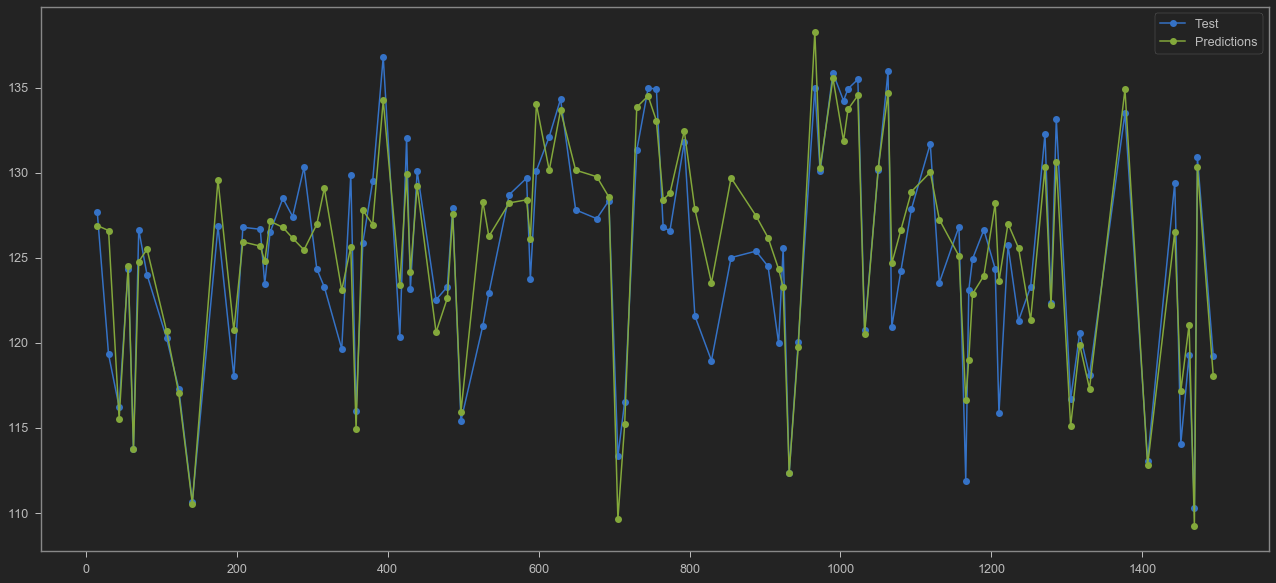

In [106]:
plt.figure(figsize=(22,10))
plt.plot(results.index[::3], results['Test'][::3], '-o', label='Test')
plt.plot(results.index[::3], results['Predictions'][::3], '-o', label='Predictions')
plt.legend()
plt.show()

Jointplot:

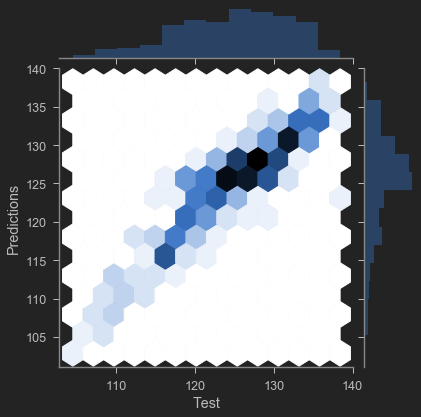

In [107]:
sns.jointplot(x='Test', y='Predictions', data=results, kind='hex');

# Model comparison 
(Linear Regression, SVR, Decision Tree, Random Forest, XGB)

In [108]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

names = []
R2_scores = []
    
models = [('LR', LinearRegression()),
          ('PLR', LinearRegression()),
          ('SVR', SVR(kernel='rbf', gamma='auto')),
          ('DT', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor(n_estimators=10)),
          ('XGB', XGBRegressor())]
    
for name, model in models:
    
    print(f'Current model: {model}\n')
    
    if name=='PLR':
        X=X_poly_train  #polynomial regression
    else:
        X=X_train       #any other regression
    
    model.fit(X, y_train)
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    R2_score = model_selection.cross_val_score(model, X, y_train, cv=kfold) #scoring = 'r2' by default for regression
    
    names.append(name)
    R2_scores.append(R2_score)

Current model: LinearRegression()

Current model: LinearRegression()

Current model: SVR(gamma='auto')

Current model: DecisionTreeRegressor()

Current model: RandomForestRegressor(n_estimators=10)

Current model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)



In [109]:
R2_scores

[array([0.40607756, 0.34518806, 0.54416977, 0.60836042, 0.43624265,
        0.45724765, 0.34768524, 0.6309831 , 0.5542808 , 0.51949355]),
 array([0.82961874, 0.77402417, 0.80670298, 0.81728584, 0.80263353,
        0.74776524, 0.69157539, 0.79059398, 0.85966971, 0.81846616]),
 array([0.6391445 , 0.5880274 , 0.75055059, 0.75557481, 0.63168835,
        0.63762472, 0.51141643, 0.79020506, 0.74153903, 0.66791506]),
 array([0.86488462, 0.84146501, 0.87009079, 0.86062719, 0.80561124,
        0.88601482, 0.87762892, 0.90798054, 0.77090528, 0.84914057]),
 array([0.90844476, 0.88508162, 0.94421357, 0.92121906, 0.88263207,
        0.90581761, 0.89044364, 0.940043  , 0.90274285, 0.92076143]),
 array([0.95584318, 0.92054657, 0.94731411, 0.94331121, 0.93534229,
        0.95175465, 0.91909471, 0.96327828, 0.93531117, 0.94658989])]

### Boxplot 

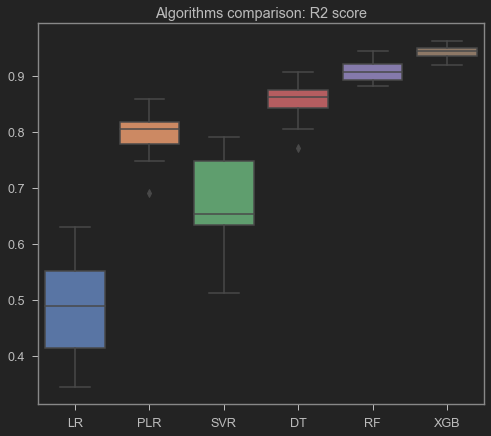

In [110]:
r2_df = pd.DataFrame(np.transpose(R2_scores), columns=['LR', 'PLR', 'SVR', 'DT','RF', 'XGB'])

ax = sns.boxplot(data=r2_df, palette='deep')
ax.set_title('Algorithms comparison: R2 score');

In [111]:
#Other way:
# fig, ax = plt.subplots()
# ax.set_title('Algorithms comparison: Accuracy')
# ax.set_xticklabels(names)
# ax.set_ylabel('Cross-Validation: Accuracy')
# ax.boxplot(accuracies)
# plt.show()

In [112]:
mean_R2_scores = [result.mean() for result in R2_scores]
mean_R2_scores

[0.48497288047299403,
 0.7938335752869287,
 0.6713685943393249,
 0.8534348990172459,
 0.9101399604897817,
 0.9418386058774585]

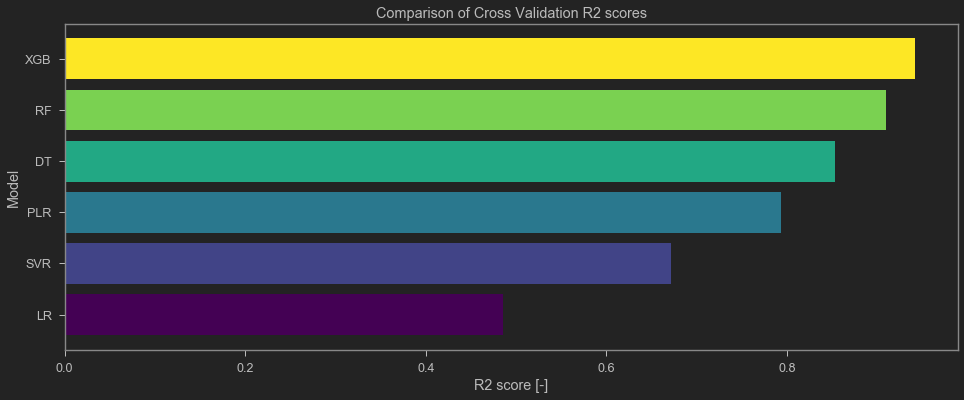

In [113]:
from matplotlib import cm

shortcuts_df = pd.DataFrame({'Models': names, 'R2 scores': mean_R2_scores})
viridis = cm.get_cmap('viridis', 6)

plt.figure(figsize=(16,6))

plt.barh(y = shortcuts_df.sort_values('R2 scores', ascending=True)['Models'],
         width = shortcuts_df.sort_values('R2 scores', ascending=True)['R2 scores'], 
         color=viridis(np.linspace(0, 1, 6)));

plt.xlabel('R2 score [-]')
plt.ylabel('Model')
plt.title('Comparison of Cross Validation R2 scores')
plt.show()

# Deciding to use XGB Boost:

Using XGB with default setup:

In [114]:
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
predictions_XGB = model_XGB.predict(X_test)

### R2 score:

In [116]:
r2_score(y_test, predictions_XGB)

0.9517809180941498

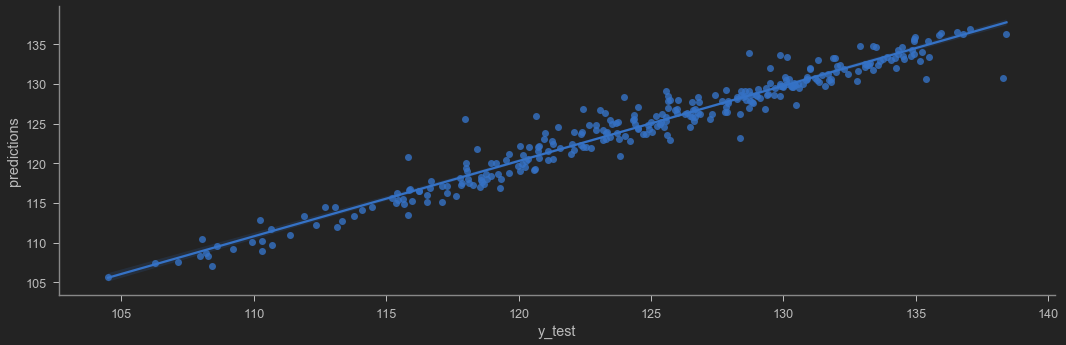

In [117]:
pred_XGB_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions_XGB})

sns.lmplot(x='y_test', 
           y='predictions', 
           data=pred_XGB_df,
           height=5, 
           aspect=3);

A very good fit compared to other models!

### Residuals (y_test - y_pred) - checking for normality:

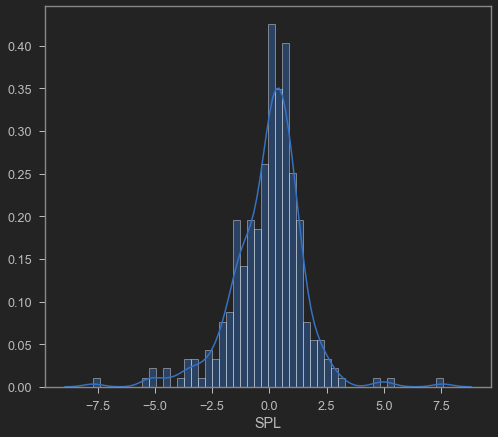

In [118]:
sns.distplot((y_test-predictions_XGB),
             bins=50,
             hist_kws=dict(edgecolor="w", linewidth=1));

The smallest standard deviation of the residuals:

In [119]:
(y_test-predictions_XGB).std()

1.5559256899970528

In [120]:
results_XGB = pd.DataFrame({'Test': y_test, 'Predictions': predictions_XGB})
results_XGB.sort_index(inplace=True)
results_XGB

Test  Predictions
15    127.696   127.878067
23    121.106   121.507217
29    118.129   117.490829
30    119.319   117.991508
32    124.809   123.757660
...       ...          ...
1471  107.147   107.530579
1473  130.898   130.570587
1481  123.178   124.204453
1493  118.964   118.407310
1494  119.224   118.594498

[301 rows x 2 columns]

SPL plot for every 3rd measurement for clarity:

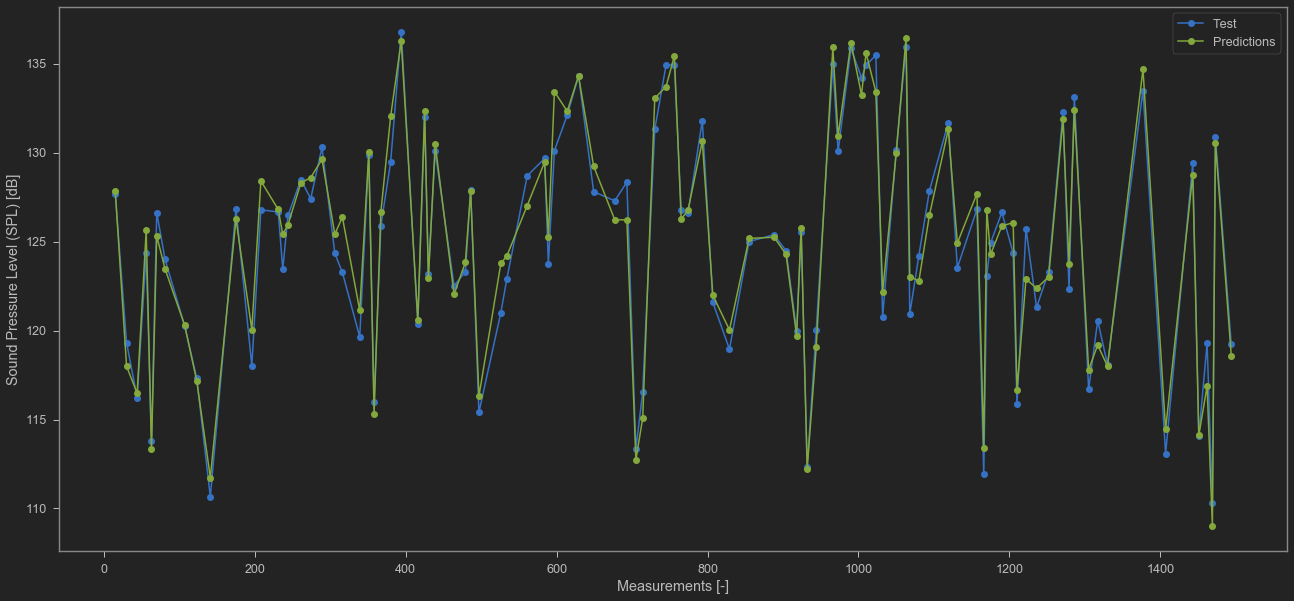

In [121]:
plt.figure(figsize=(22,10))
plt.plot(results_XGB.index[::3], results_XGB['Test'][::3], '-o', label='Test')
plt.plot(results_XGB.index[::3], results_XGB['Predictions'][::3], '-o', label='Predictions')
plt.xlabel('Measurements [-]')
plt.ylabel('Sound Pressure Level (SPL) [dB]')
plt.legend()
plt.show()

Predicted values quite closely follow the test measurements.

Total Execution time:

In [122]:
print(datetime.now() - startTime)

0:00:15.645190
